In [1]:
# takes 5m for 2m records. Perform experiments to determine metrics. Lots of charts.
# uses examples from: https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b

# todo:

# next steps:
# acbl_hand_records_evaluation_experiments.ipynb creates acbl_hand_records_evaluated.pkl
# merge-hand-records.ipynb merges acbl and tcg standardized hand records?

# previous steps:
# acbl_hand_records_dd_train_probabilities_fastai.ipynb creates model to predict expected probabilites of contracts.
# acbl_hand_records_dd_experiments.ipynb creates acbl_hand_records_dd.pkl

# Requirements
# https://github.com/Afwas/python-dds with some of my mods.
# If pickle errors: pip install --upgrade pandas

In [2]:
import pandas as pd
import pathlib
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import display # needed to define display() method in vscode
import sys
import sklearn.metrics

In [3]:
sys.path.append(str(pathlib.Path.cwd().parent.joinpath('mlBridgeLib')))
sys.path
import mlBridgeLib

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
savedModelsPath = acblPath.joinpath('SavedModels')
savedModelsPath.mkdir(parents=True, exist_ok=True)

In [6]:
# takes 30s
# read model parameters
acbl_hand_records_dd_train_probabilities_filename = 'acbl_hand_records_dd_train_probabilities.pkl'
print(f'Reading model parameters from file:{acbl_hand_records_dd_train_probabilities_filename}')
acbl_hand_records_dd_train_probabilities_file = acblPath.joinpath(acbl_hand_records_dd_train_probabilities_filename)
augmented_df,df,valid_idx,test_df,y_names,cont_names,cat_names = pd.read_pickle(acbl_hand_records_dd_train_probabilities_file)

Reading model parameters from file:acbl_hand_records_dd_train_probabilities.pkl


In [7]:
augmented_df.columns.to_list()

['ref',
 'hand_record_id',
 'event_id',
 'Board',
 'EventBoard',
 'Dealer',
 'Vul',
 'board_record_string',
 'Hands',
 'Par',
 'Par_var',
 'Par_nwse',
 'DDmakes',
 'DDmakes_nwse',
 'DD_N_C',
 'DD_N_D',
 'DD_N_H',
 'DD_N_S',
 'DD_N_N',
 'DD_E_C',
 'DD_E_D',
 'DD_E_H',
 'DD_E_S',
 'DD_E_N',
 'DD_S_C',
 'DD_S_D',
 'DD_S_H',
 'DD_S_S',
 'DD_S_N',
 'DD_W_C',
 'DD_W_D',
 'DD_W_H',
 'DD_W_S',
 'DD_W_N',
 'Hands_Bin',
 'HB_N',
 'HB_E',
 'HB_S',
 'HB_W',
 'HCP',
 'HCP_N',
 'HCP_N_S',
 'HCP_N_H',
 'HCP_N_D',
 'HCP_N_C',
 'HCP_E',
 'HCP_E_S',
 'HCP_E_H',
 'HCP_E_D',
 'HCP_E_C',
 'HCP_S',
 'HCP_S_S',
 'HCP_S_H',
 'HCP_S_D',
 'HCP_S_C',
 'HCP_W',
 'HCP_W_S',
 'HCP_W_H',
 'HCP_W_D',
 'HCP_W_C',
 'QT',
 'QT_N',
 'QT_N_S',
 'QT_N_H',
 'QT_N_D',
 'QT_N_C',
 'QT_E',
 'QT_E_S',
 'QT_E_H',
 'QT_E_D',
 'QT_E_C',
 'QT_S',
 'QT_S_S',
 'QT_S_H',
 'QT_S_D',
 'QT_S_C',
 'QT_W',
 'QT_W_S',
 'QT_W_H',
 'QT_W_D',
 'QT_W_C',
 'Suit_Lengths',
 'SL_N_S',
 'SL_N_H',
 'SL_N_D',
 'SL_N_C',
 'SL_E_S',
 'SL_E_H',
 'SL_E_D

In [8]:
hcp_dd_cm = pd.crosstab(augmented_df['HCP_NS'], augmented_df['DD_N_N'], normalize='index')
hcp_dd_cm

DD_N_N,0,1,2,3,4,5,6,7,8,9,10,11,12,13
HCP_NS,,,,,,,,,,,,,,
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.97,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.88,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.79,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.66,0.33,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.52,0.43,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.37,0.51,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.26,0.49,0.22,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
hcp_dd_cm.describe()

DD_N_N,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,0.17,0.09,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.05,0.07,0.18
std,0.32,0.16,0.12,0.10,0.09,0.09,0.09,0.09,0.09,0.08,0.09,0.10,0.15,0.35
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.13,0.10,0.05,0.03,0.03,0.03,0.04,0.04,0.04,0.02,0.02,0.02,0.04,0.12
max,1.00,0.51,0.39,0.34,0.32,0.31,0.32,0.31,0.31,0.30,0.31,0.36,0.52,1.00


In [330]:
hcp_dd_cm.columns.name

'DD_N_N'

In [337]:
import seaborn as sns
def plot_heatmap(cross_table, fmt='.2f', xlabel=None, ylabel=None, title=None):
    if xlabel is None: xlabel = cross_table.columns.name
    if ylabel is None: ylabel = cross_table.index.name
    if title is None: title = f'Heat Map of {xlabel} vs {ylabel}'
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

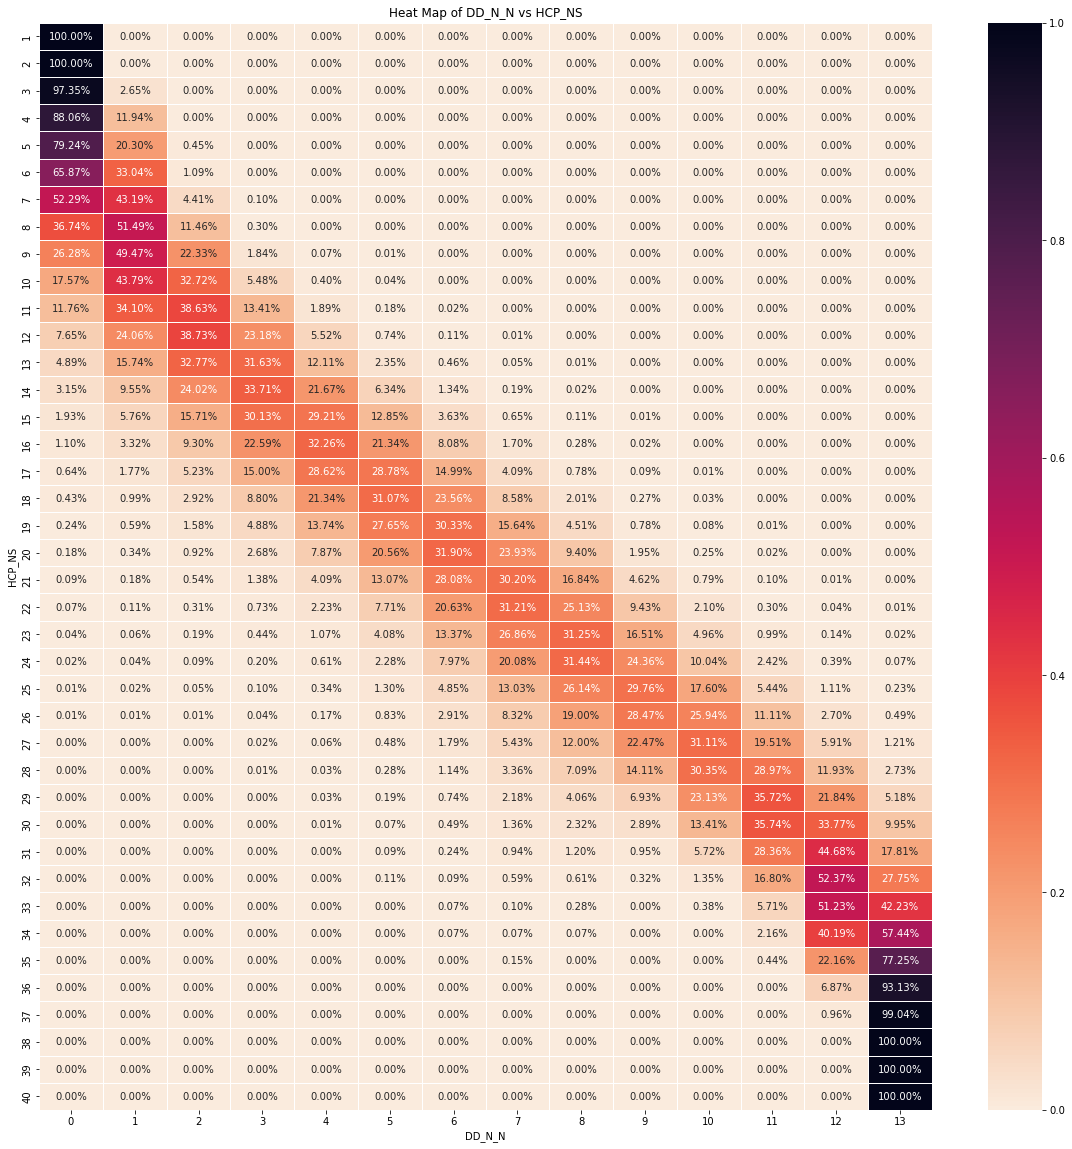

In [338]:
plot_heatmap(hcp_dd_cm,fmt='.2%')

In [12]:
# Create pivot table of showing mean DD tricks given HCP_NS and QT_NS. Default is aggfunc=np.mean().
hcp_qt_dd = augmented_df.pivot_table(
    values='DD_N_N',
    index='HCP_NS',
    columns='QT_NS')
hcp_qt_dd

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
HCP_NS,,,,,,,,,,,,,,,,,
1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06,0.20,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.14,0.22,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.22,0.33,0.59,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.41,0.46,0.65,0.68,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.61,0.68,0.80,0.93,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.92,0.88,0.99,1.11,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Create pd.crosstab showing mean DD tricks given HCP_NS and QT_NS.
# dependency on numpy
#hcp_qt_dd = pd.crosstab(
#    index=augmented_df['HCP_NS'],
#    columns=augmented_df['QT_NS'],
#    values=augmented_df['DD_N_N'],
#    aggfunc=np.mean)
#hcp_qt_dd

In [14]:
# using groupby() which is faster than pivot_table and crosstab
hcp_qt_dd = augmented_df.groupby(['HCP_NS', 'QT_NS'])['DD_N_N'].mean().unstack()
hcp_qt_dd

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
HCP_NS,,,,,,,,,,,,,,,,,
1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06,0.20,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.14,0.22,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.22,0.33,0.59,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.41,0.46,0.65,0.68,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.61,0.68,0.80,0.93,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.92,0.88,0.99,1.11,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


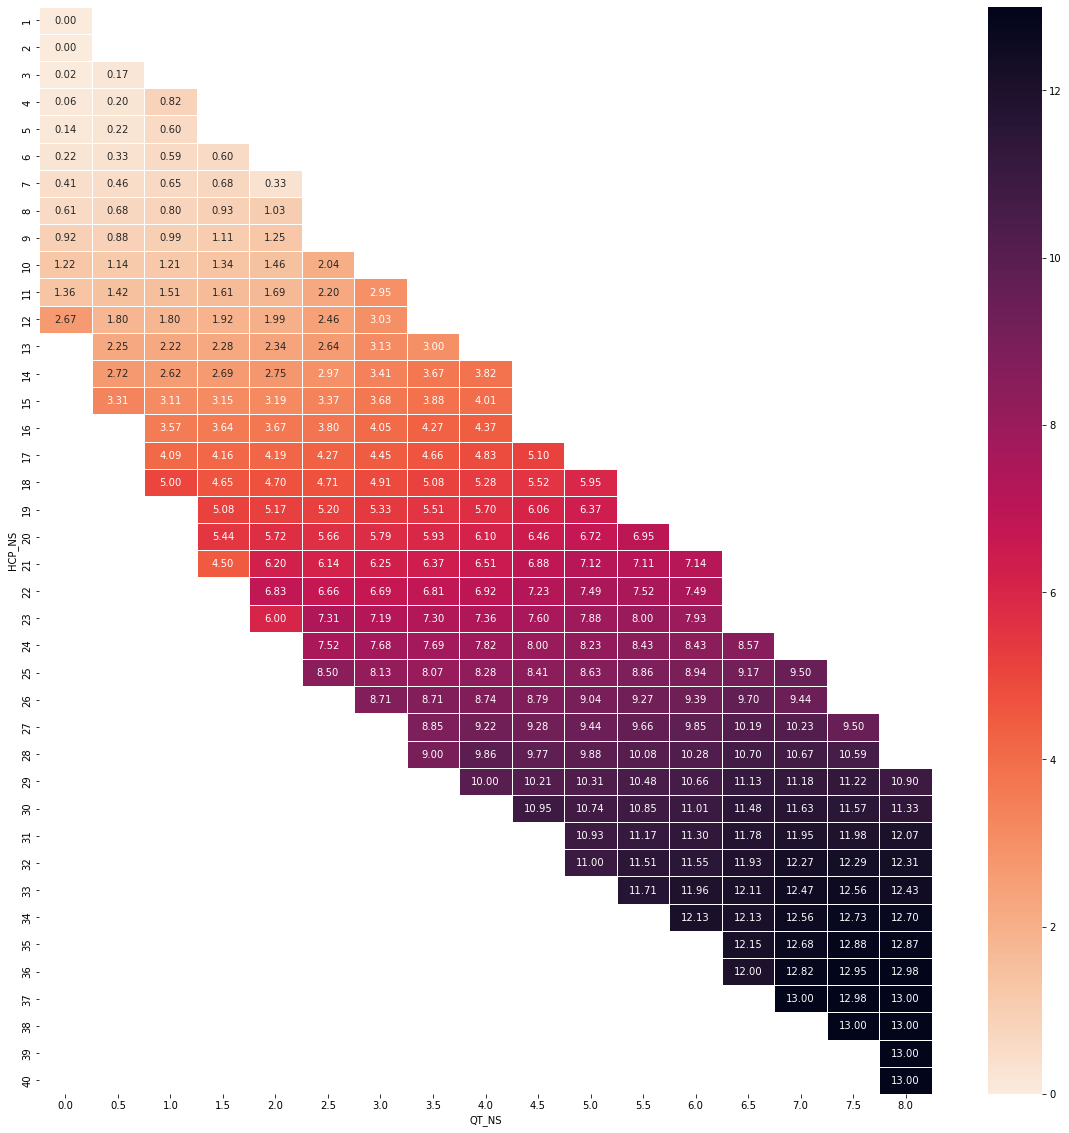

In [15]:
# nice. heatmap shows mean DD tricks given hcp and qt.
plot_heatmap(hcp_qt_dd)

<AxesSubplot:title={'center':'Frequency of HCP vs DD'}, xlabel='HCP_NS'>

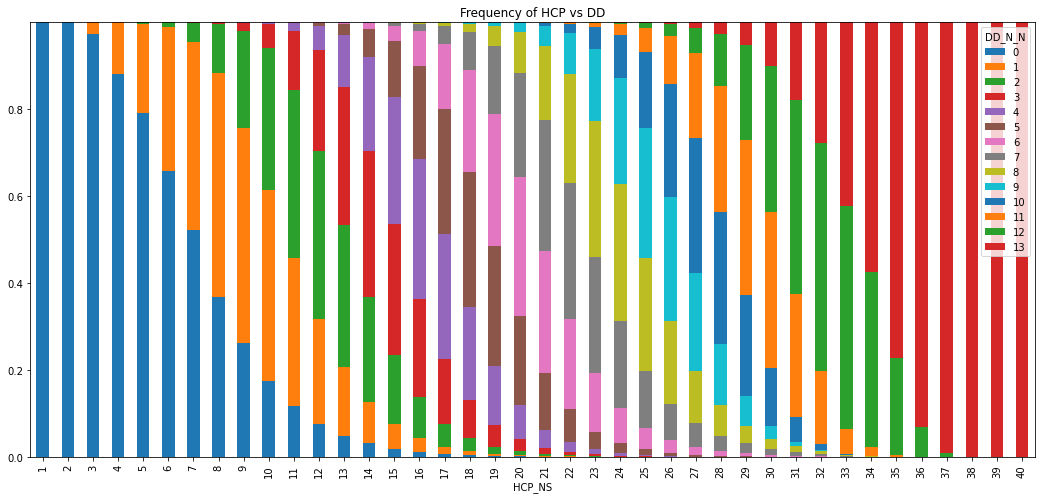

In [16]:
# not as obvious as heatmap
hcp_dd_cm.plot(kind='bar', stacked=True, figsize=(18,8), title='Frequency of HCP vs DD')

In [17]:
qt_dd_cm = pd.crosstab(augmented_df['QT_NS'], augmented_df['DD_N_N'], normalize='index')
qt_dd_cm

DD_N_N,0,1,2,3,4,5,6,7,8,9,10,11,12,13
QT_NS,,,,,,,,,,,,,,
0.00,0.59,0.31,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.50,0.31,0.40,0.20,0.07,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1.00,0.14,0.36,0.28,0.14,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1.50,0.06,0.22,0.29,0.22,0.13,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2.00,0.04,0.10,0.23,0.24,0.20,0.12,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2.50,0.02,0.03,0.11,0.21,0.24,0.21,0.13,0.04,0.01,0.00,0.00,0.00,0.00,0.00
3.00,0.01,0.01,0.04,0.13,0.20,0.25,0.22,0.11,0.03,0.01,0.00,0.00,0.00,0.00
3.50,0.00,0.00,0.01,0.05,0.12,0.21,0.27,0.20,0.10,0.03,0.01,0.00,0.00,0.00
4.00,0.00,0.00,0.01,0.02,0.06,0.13,0.22,0.25,0.18,0.09,0.03,0.00,0.00,0.00


<AxesSubplot:title={'center':'Frequency of QT vs DD'}, xlabel='QT_NS'>

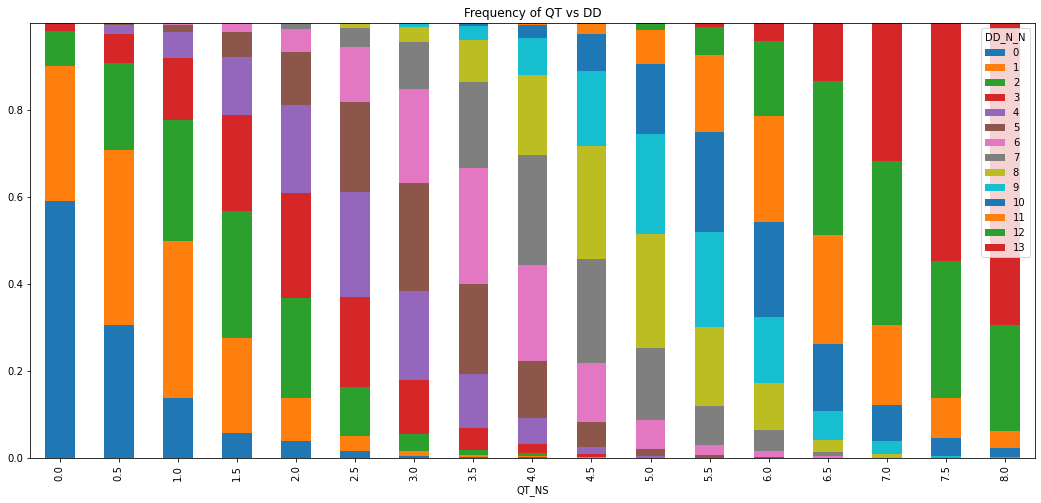

In [18]:
qt_dd_cm.plot(kind='bar', stacked=True, figsize=(18,8), title='Frequency of QT vs DD')

In [19]:
dd_qt_cm = pd.crosstab(augmented_df['DD_N_N'], augmented_df['QT_NS'], normalize='index')
dd_qt_cm

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
DD_N_N,,,,,,,,,,,,,,,,,
0,0.08,0.16,0.20,0.16,0.20,0.11,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.02,0.09,0.23,0.27,0.21,0.10,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.03,0.11,0.22,0.30,0.20,0.09,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.01,0.04,0.12,0.23,0.27,0.21,0.09,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.01,0.06,0.15,0.25,0.26,0.17,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.02,0.07,0.18,0.27,0.24,0.15,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.01,0.03,0.10,0.21,0.27,0.22,0.11,0.04,0.01,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.01,0.04,0.11,0.21,0.27,0.21,0.11,0.04,0.01,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.12,0.23,0.27,0.20,0.09,0.03,0.00,0.00,0.00,0.00


<AxesSubplot:title={'center':'Frequency of DD vs QT'}, xlabel='DD_N_N'>

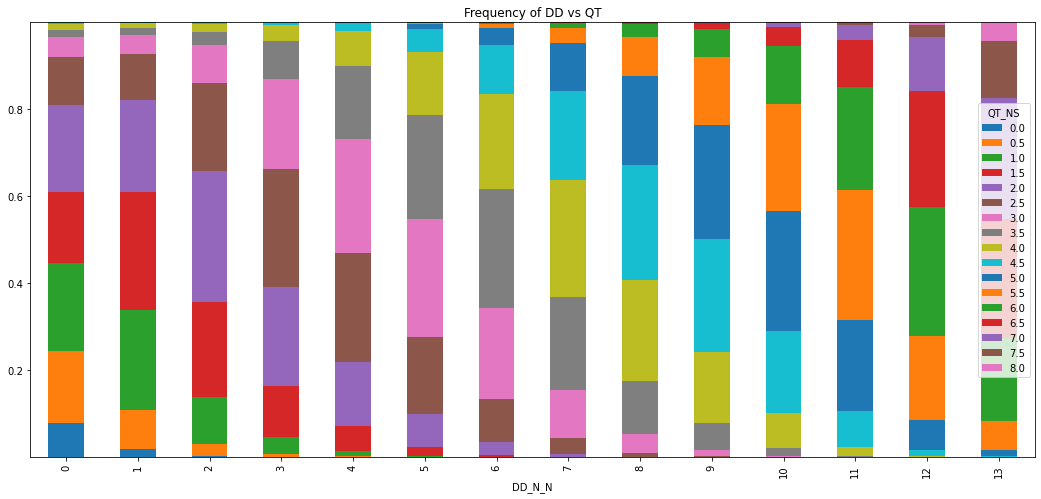

In [20]:
dd_qt_cm.plot(kind='bar', stacked=True, figsize=(18,8), title='Frequency of DD vs QT')

In [21]:
hcp_qt_cm = pd.crosstab(augmented_df['HCP_NS'], augmented_df['QT_NS'], normalize='index')
hcp_qt_cm

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
HCP_NS,,,,,,,,,,,,,,,,,
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.95,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.76,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.54,0.37,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.36,0.40,0.23,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.21,0.42,0.33,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.11,0.35,0.40,0.12,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.05,0.25,0.42,0.22,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<AxesSubplot:title={'center':'Frequency of DD vs QT'}, xlabel='HCP_NS'>

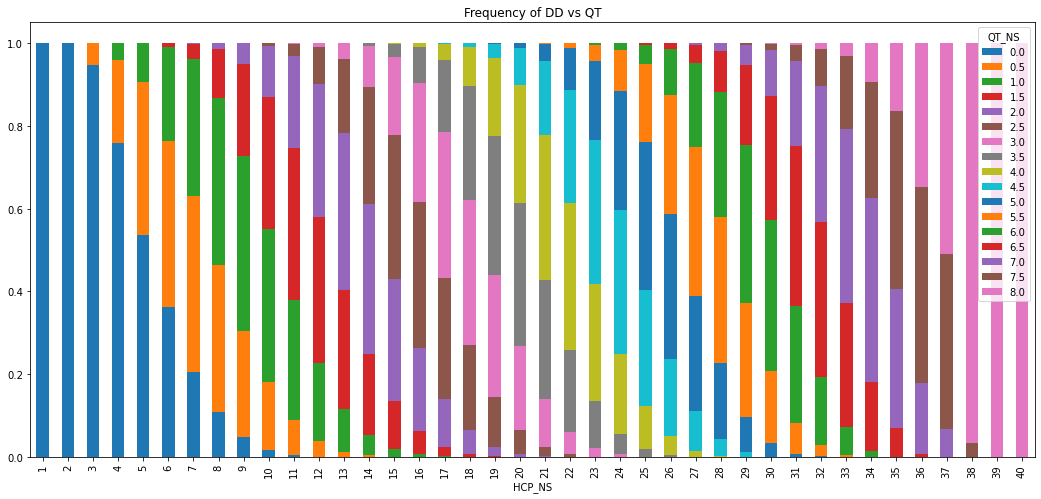

In [22]:
hcp_qt_cm.plot(kind='bar', stacked=True, figsize=(18,8), title='Frequency of DD vs QT')

In [23]:
# Create column of Quick Trick values. Might be easier to do using binary encoded hands.
qtl = [(2,'AK'),(1.5,'AQ'),(1,'A'),(1,'KQ'),(0.5,'K'),(.85,'KQJ'),(0.75,'KJ')] # list of (quick tricks card combos, combo value)
qtls = sorted(qtl,reverse=True) # sort by quick trick value (most to least) to avoid ambiguity
def HandsToQT(hands):
    t = tuple(HandToQT(hand) for hand in hands)
    return sum(h[0] for h in t),t
def HandToQT(hand):
    t = tuple(SuitToQT(suit) for suit in hand)
    return sum(t),t
def SuitToQT(suit):
    # assumes suits are sorted by HCP value (most to least) (AKQJT...)
    for qt in qtls:
        if suit.startswith(qt[1]):
            return qt[0]
    return 0


In [24]:
augmented_df['QTJ_N'] = augmented_df['Hands'].map(lambda r: HandsToQT(r)[1][0][0])
augmented_df['QTJ_S'] = augmented_df['Hands'].map(lambda r: HandsToQT(r)[1][2][0])
augmented_df['QTJ_NS'] = augmented_df['QTJ_N']+augmented_df['QTJ_S']
augmented_df['QTJ_NS']

0         4.00
1         3.50
2         4.75
3         1.50
4         2.00
5         4.00
6         2.75
7         3.25
8         3.50
9         2.75
10        4.50
11        3.00
12        4.00
13        4.50
14        4.50
15        4.00
16        4.50
17        4.00
18        2.50
19        3.50
20        6.50
21        3.50
22        7.00
23        1.75
24        4.50
          ... 
1610481   3.50
1610482   3.50
1610483   3.25
1610484   2.75
1610485   4.00
1610486   3.00
1610487   1.50
1610488   4.25
1610489   3.00
1610490   6.00
1610491   3.50
1610492   4.00
1610493   3.50
1610494   5.75
1610495   2.50
1610496   1.50
1610497   4.50
1610498   2.50
1610499   5.00
1610500   1.00
1610501   4.00
1610502   2.25
1610503   3.25
1610504   1.50
1610505   4.50
Name: QTJ_NS, Length: 1559556, dtype: float64

In [25]:
augmented_df['DP_NS'] = augmented_df['DP_N']+augmented_df['DP_S']

In [26]:
for s in mlBridgeLib.CDHS:
    augmented_df[f'HCP_NS_{s}'] = augmented_df[f'HCP_N_{s}']+augmented_df[f'HCP_S_{s}']
augmented_df['HCP_NS_CDHS_min'] = augmented_df.filter(regex=f'^HCP_NS_[{mlBridgeLib.CDHS}]$').min(axis='columns')
augmented_df.filter(regex=f'^HCP_NS')

,HCP_NS,HCP_NS_S,HCP_NS_H,HCP_NS_D,HCP_NS_C,HCP_NS_CDHS_min
0,21,3,8,5,5,3
1,22,3,6,7,6,3
2,23,4,6,10,3,3
3,12,4,6,1,1,1
4,13,0,3,2,8,0
5,20,5,8,0,7,0
6,16,5,1,2,8,1
7,16,5,0,7,4,0
8,16,0,7,3,6,0
9,19,4,4,5,6,4


In [27]:
# todo: move DP_NS into augmented ipynb
cols = ['DD_N_N_avg','HCP_NS','QT_NS','DP_NS','QTJ_NS','HCP_NS_CDHS_min']
df = augmented_df[cols][augmented_df['DD_N_N'].between(9,13)].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288922 entries, 13 to 1610505
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DD_N_N_avg       288922 non-null  float64
 1   HCP_NS           288922 non-null  int8   
 2   QT_NS            288922 non-null  float32
 3   DP_NS            288922 non-null  uint8  
 4   QTJ_NS           288922 non-null  float64
 5   HCP_NS_CDHS_min  288922 non-null  int8   
dtypes: float32(1), float64(2), int8(2), uint8(1)
memory usage: 8.5 MB


In [28]:
df['DD_N_N_avg'].value_counts()

9.00     61105
10.00    45166
9.50     37984
8.50     28919
11.00    28185
10.50    25513
12.00    16096
11.50    14188
8.00     12532
13.00     6442
7.50      5176
12.50     4490
7.00      2060
6.50       751
6.00       225
5.50        58
5.00        22
4.50        10
Name: DD_N_N_avg, dtype: int64

In [29]:
# sure looks like HCP is the correlator with DD_N_N.
df['HCPxQT'] = df['HCP_NS']/(df['HCP_NS'].max())+df['HCP_NS_CDHS_min']/(df['HCP_NS_CDHS_min'].max())#+df['HCP_NS_CDHS_min']
df_corr = df.corr()
df_corr

,DD_N_N_avg,HCP_NS,QT_NS,DP_NS,QTJ_NS,HCP_NS_CDHS_min,HCPxQT
DD_N_N_avg,1.00,0.76,0.68,0.08,0.69,0.50,0.65
HCP_NS,0.76,1.00,0.78,-0.07,0.79,0.58,0.79
QT_NS,0.68,0.78,1.00,0.02,0.99,0.45,0.62
DP_NS,0.08,-0.07,0.02,1.00,0.02,-0.08,-0.08
QTJ_NS,0.69,0.79,0.99,0.02,1.00,0.46,0.63
HCP_NS_CDHS_min,0.50,0.58,0.45,-0.08,0.46,1.00,0.95
HCPxQT,0.65,0.79,0.62,-0.08,0.63,0.95,1.00


In [31]:
v = 0
l = []
rez = 10
for hcp in range(1,rez):
    for qt in range(1,rez):
        for x in range(1,rez):
            df['HCPxQT'] = (df['QTJ_NS']/x)
            df_corr = df[['DD_N_N_avg','HCPxQT']].corr()
            l.append((df_corr.values[0][1],hcp,qt,x))
max(l),l

((0.6880200315284859, 9, 9, 6),
 [(0.6880200315284731, 1, 1, 1),
  (0.6880200315284731, 1, 1, 2),
  (0.6880200315284859, 1, 1, 3),
  (0.6880200315284731, 1, 1, 4),
  (0.688020031528471, 1, 1, 5),
  (0.6880200315284859, 1, 1, 6),
  (0.6880200315284769, 1, 1, 7),
  (0.6880200315284731, 1, 1, 8),
  (0.6880200315284761, 1, 1, 9),
  (0.6880200315284731, 1, 2, 1),
  (0.6880200315284731, 1, 2, 2),
  (0.6880200315284859, 1, 2, 3),
  (0.6880200315284731, 1, 2, 4),
  (0.688020031528471, 1, 2, 5),
  (0.6880200315284859, 1, 2, 6),
  (0.6880200315284769, 1, 2, 7),
  (0.6880200315284731, 1, 2, 8),
  (0.6880200315284761, 1, 2, 9),
  (0.6880200315284731, 1, 3, 1),
  (0.6880200315284731, 1, 3, 2),
  (0.6880200315284859, 1, 3, 3),
  (0.6880200315284731, 1, 3, 4),
  (0.688020031528471, 1, 3, 5),
  (0.6880200315284859, 1, 3, 6),
  (0.6880200315284769, 1, 3, 7),
  (0.6880200315284731, 1, 3, 8),
  (0.6880200315284761, 1, 3, 9),
  (0.6880200315284731, 1, 4, 1),
  (0.6880200315284731, 1, 4, 2),
  (0.688020031

In [43]:
# is it better for the big hand to be the declarer?
# appears to be a big yes except for double dummy of 7 tricks.
for dd in range(0,14):
    df = augmented_df[augmented_df['DD_N_N'].eq(dd)&augmented_df['DD_N_N'].ne(augmented_df['DD_S_N'])].copy()
    df['DD_N_N_big'] = (df['DD_N_N'] > df['DD_S_N'])
    df['DD_N_N_small'] = (df['DD_N_N'] < df['DD_S_N'])
    df['HCP_N_big'] = (df['HCP_N'] > df['HCP_S'])
    df['HCP_N_small'] = (df['HCP_N'] < df['HCP_S'])
    df_n_big_big = df[df['DD_N_N_big']&df['HCP_N_big']]
    df_n_big_small = df[df['DD_N_N_big']&df['HCP_N_small']]
    df_n_small_big = df[df['DD_N_N_small']&df['HCP_N_big']]
    df_n_small_small = df[df['DD_N_N_small']&df['HCP_N_small']]
    #cols = ['DD_N_N','DD_S_N','DD_N_N_big','HCP_N','HCP_S','HCP_N_big']
    print(dd,df.size,df_n_big_big.size,df_n_big_small.size,df_n_small_big.size,df_n_small_small.size)

0 426996 0 0 158688 244296
1 1486656 155556 77256 382104 777780
2 3670704 643104 305892 878004 1609848
3 6789132 1398960 754812 1512756 2736324
4 10421208 2340648 1402092 2284272 3804336
5 14042844 3534984 2084868 2891880 4732452
6 17042256 4596732 2716488 3391956 5412096
7 18696996 5124996 3243708 3657132 5662656
8 18168732 5245056 3439980 3343932 5143788
9 14920848 4945428 3373164 2308284 3458772
10 11202120 4215672 2800008 1498140 2028492
11 7444764 2877264 1910520 878004 1357200
12 3268764 1746612 1274724 21924 41760
13 99180 58464 34452 0 0


In [140]:
# todo: move DP_NS into augmented ipynb
cols = ['DD_N_S','HCP_NS','QT_NS','DP_NS','QTJ_NS','HCP_NS_CDHS_min']
df = augmented_df[cols][augmented_df['DD_N_S'].between(0,13)].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559556 entries, 0 to 1610505
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   DD_N_S           1559556 non-null  int8   
 1   HCP_NS           1559556 non-null  int8   
 2   QT_NS            1559556 non-null  float32
 3   DP_NS            1559556 non-null  uint8  
 4   QTJ_NS           1559556 non-null  float64
 5   HCP_NS_CDHS_min  1559556 non-null  int8   
dtypes: float32(1), float64(1), int8(3), uint8(1)
memory usage: 35.7 MB


In [369]:
# for suit contract, HCP and suit length are the most significant correlator for DD_N_S but a pinch of QT helps.
cols = ['DD_N_C','DD_N_S','DD_N_N','HCP_NS','QT_NS','DP_NS','QTJ_NS','NCA','NDA','NHA','NSA','SL_N_C','SL_NS_C','SL_NS_S','QT_NS_S']
df = augmented_df[cols].copy()
df['X'] = df['HCP_NS']+df['SL_NS_S']*3 #+df['QTJ_NS']*1.2 #+df['DP_NS']#+df[['NCA','NDA','NHA','NSA']].sum(axis='columns')*.4
df_corr = df.corr()
df_corr
#df

,DD_N_C,DD_N_S,DD_N_N,HCP_NS,QT_NS,DP_NS,QTJ_NS,NCA,NDA,NHA,NSA,SL_N_C,SL_NS_C,SL_NS_S,QT_NS_S,X
DD_N_C,1.00,0.40,0.65,0.66,0.64,0.10,0.64,0.25,0.12,0.12,0.12,0.36,0.62,-0.21,0.21,0.32
DD_N_S,0.40,1.00,0.65,0.66,0.64,0.10,0.64,0.12,0.12,0.12,0.25,-0.12,-0.21,0.62,0.55,0.91
DD_N_N,0.65,0.65,1.00,0.88,0.83,-0.02,0.83,0.20,0.20,0.20,0.20,-0.00,0.00,-0.00,0.39,0.62
HCP_NS,0.66,0.66,0.88,1.00,0.91,-0.00,0.92,0.20,0.20,0.20,0.20,-0.00,0.00,-0.00,0.43,0.71
QT_NS,0.64,0.64,0.83,0.91,1.00,0.03,1.00,0.23,0.23,0.23,0.23,-0.00,0.00,-0.00,0.47,0.65
DP_NS,0.10,0.10,-0.02,-0.00,0.03,1.00,0.03,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.02,-0.00
QTJ_NS,0.64,0.64,0.83,0.92,1.00,0.03,1.00,0.23,0.23,0.23,0.23,-0.00,0.00,-0.00,0.47,0.65
NCA,0.25,0.12,0.20,0.20,0.23,-0.00,0.23,1.00,-0.02,-0.02,-0.02,0.24,0.14,-0.05,-0.02,0.11
NDA,0.12,0.12,0.20,0.20,0.23,0.00,0.23,-0.02,1.00,-0.02,-0.02,-0.08,-0.05,-0.05,-0.02,0.11
NHA,0.12,0.12,0.20,0.20,0.23,0.00,0.23,-0.02,-0.02,1.00,-0.02,-0.08,-0.05,-0.05,-0.02,0.11


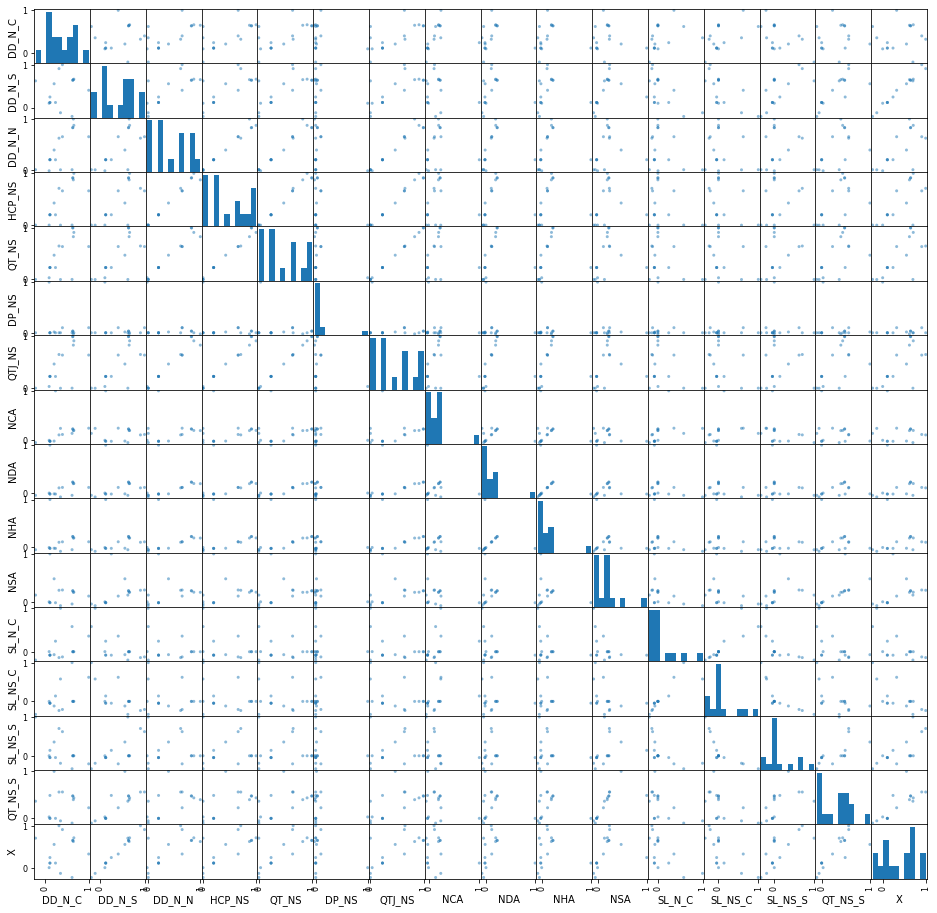

In [375]:
pd.plotting.scatter_matrix(df_corr,figsize=(16,16)); # note use of ';'  to suppress text output. Otherwise assign. e.g. axes=

In [290]:
d = 'NS'
s = 'C'
#cols = [f'DD_{d[0]}_{s}_avg',f'SL_{d}_{s}',f'SL_Max_NS',f'SL_Max_EW',f'DD_{d[0]}_N',f'HCP_{d}',f'QT_{d}',f'DP_{d}',f'QTJ_{d}']
cols = [f'DD_{d[0]}_{s}_avg',f'DD_{d[0]}_N',f'HCP_{d}',f'QT_{d}',f'DP_{d}',f'QTJ_{d}']
cols += [c for c in augmented_df.columns if re.match(f'^SL_',c)]
df = augmented_df[cols].copy()
l = []
rez = 10
for x1 in range(1,rez):
    for x2 in range(1,rez):
        for x3 in range(1,rez):
            df['X'] = df[f'HCP_{d}']/9+df[f'SL_{d}_{s}']/x1+df['DP_NS']/x2+df['SL_Max_EW'].map(lambda x: df[x])/x3
            df_corr = df[[f'DD_{d[0]}_{s}_avg','X']].corr()
            l.append((df_corr.values[0][1],x1,x2,x3))
max(l),l

TypeError: unhashable type: 'Series'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Series'


KeyboardInterrupt: 

In [302]:
augmented_df.head().apply(lambda r: (0 if r[r['SL_Max_EW']]>r['HCP_NS_'+r['SL_Max_EW'][-1]]),axis='columns')

SyntaxError: invalid syntax (Temp/ipykernel_9568/161762481.py, line 1)

In [ ]:
# l = min(SL_N_{s},SL_S_{s})
# ('A',4+3-l,4+3-l,4+3-l,4)
# ('K',3-l,3-l,3+3-l,3)
# ('Q'),3-l,3-l,3-l,2)
# ('J',3-l,3-l,3-l,1)

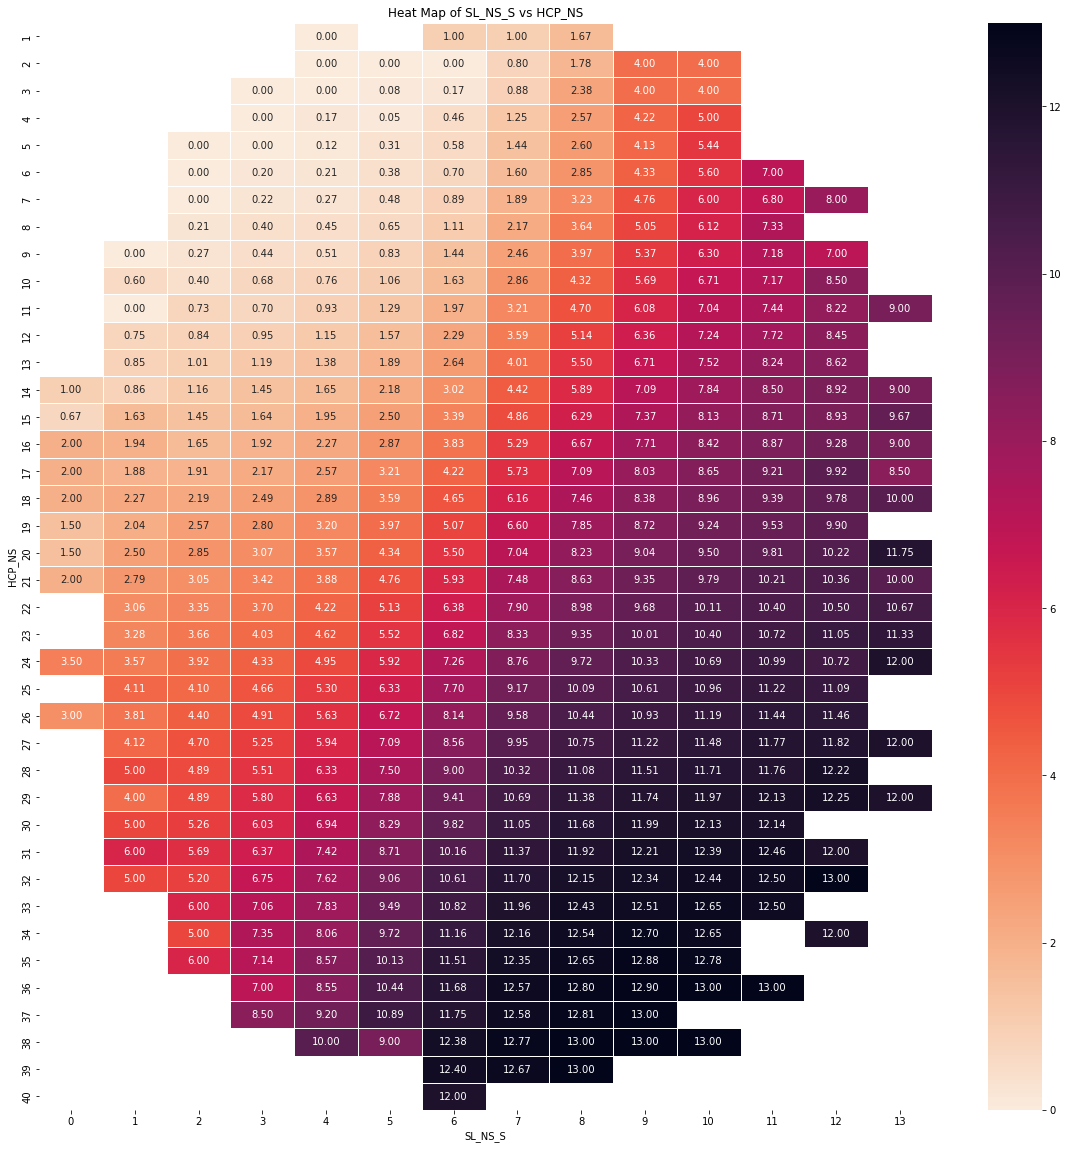

In [340]:
SLxHCPxDD = augmented_df.pivot_table(
    columns='SL_NS_S',
    index='HCP_NS',
    values='DD_N_S')
plot_heatmap(SLxHCPxDD)

In [344]:
DDxHCPxSL = augmented_df.pivot_table(
    columns='DD_N_S_avg',
    index='HCP_NS',
    values='SL_NS_S')
DDxHCPxSL

DD_N_S_avg,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00,8.50,9.00,9.50,10.00,10.50,11.00,11.50,12.00,12.50,13.00
HCP_NS,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.00,NaN,6.75,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.71,6.00,7.20,7.00,7.83,8.00,NaN,NaN,9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.40,6.43,6.81,5.00,7.80,8.00,8.00,NaN,9.33,NaN,9.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.41,5.95,6.46,6.83,7.32,7.62,7.86,8.40,8.79,NaN,9.50,9.00,9.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.24,5.75,6.39,6.62,7.34,7.42,7.87,7.94,8.56,8.60,9.29,NaN,9.67,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.25,5.56,6.12,6.52,7.12,7.32,7.69,8.15,8.44,8.67,8.81,9.00,9.44,NaN,10.00,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.14,5.43,5.95,6.43,6.84,7.21,7.55,7.91,8.08,8.61,8.82,9.21,9.19,9.38,10.14,10.00,11.00,NaN,11.00,NaN,NaN,NaN,NaN,NaN,10.00,NaN,NaN
8,5.01,5.36,5.70,6.14,6.60,6.98,7.38,7.70,7.99,8.22,8.53,8.91,9.16,9.17,9.71,9.50,9.43,10.00,10.50,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN
9,4.81,5.15,5.51,5.86,6.37,6.74,7.08,7.50,7.83,8.11,8.41,8.73,9.06,9.18,9.43,9.40,9.76,9.88,10.50,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN


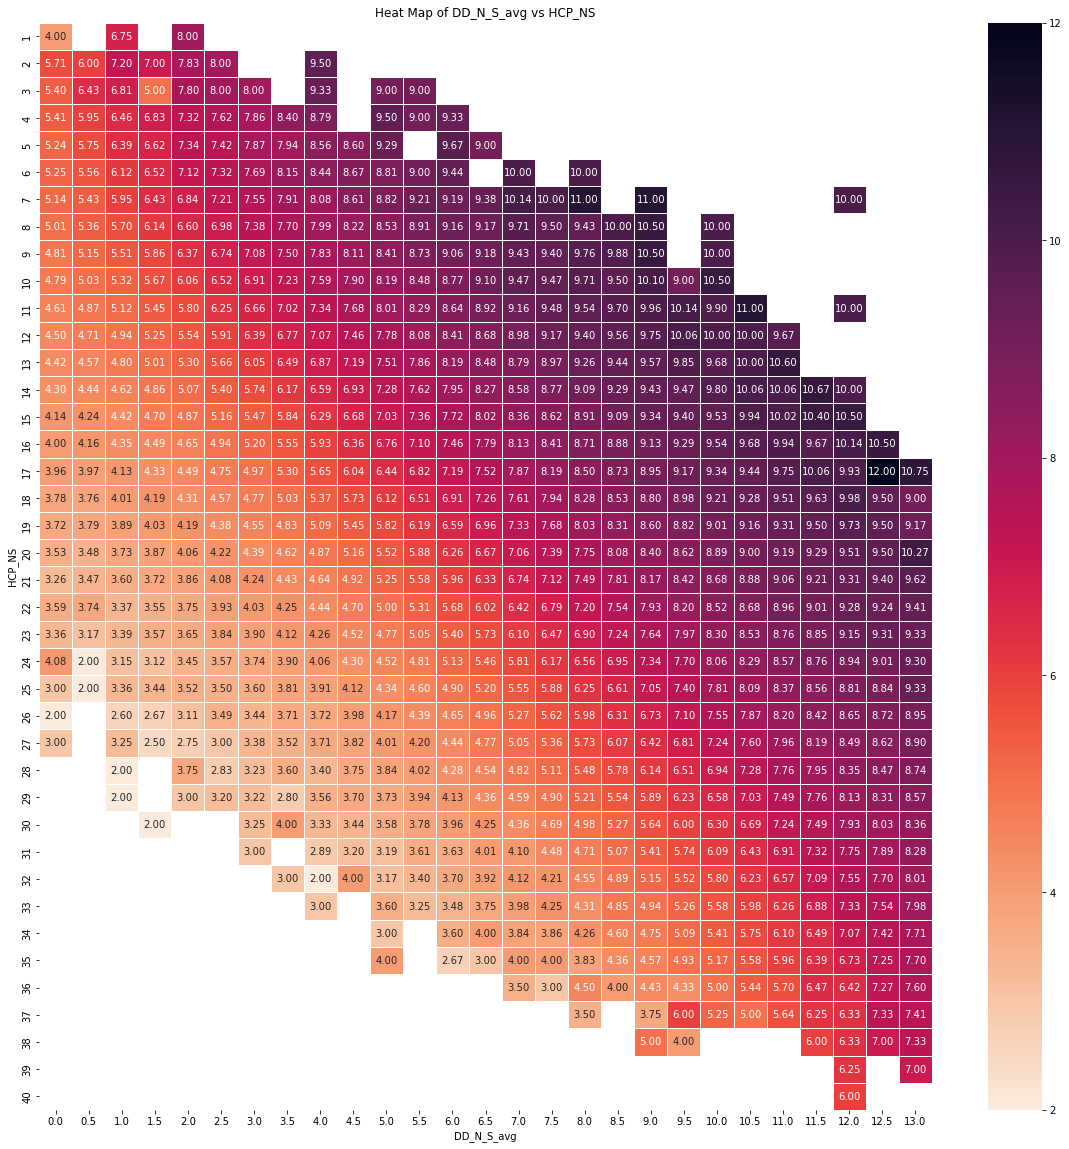

In [360]:
plot_heatmap(DDxHCPxSL)

In [377]:
# create a heatmap using pandas style.
DDxHCPxSL.style.background_gradient(cmap='coolwarm')

DD_N_S_avg,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,13.0
HCP_NS,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.00,nan,6.75,nan,8.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,5.71,6.00,7.20,7.00,7.83,8.00,nan,nan,9.50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,5.40,6.43,6.81,5.00,7.80,8.00,8.00,nan,9.33,nan,9.00,9.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,5.41,5.95,6.46,6.83,7.32,7.62,7.86,8.40,8.79,nan,9.50,9.00,9.33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,5.24,5.75,6.39,6.62,7.34,7.42,7.87,7.94,8.56,8.60,9.29,nan,9.67,9.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,5.25,5.56,6.12,6.52,7.12,7.32,7.69,8.15,8.44,8.67,8.81,9.00,9.44,nan,10.00,nan,10.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,5.14,5.43,5.95,6.43,6.84,7.21,7.55,7.91,8.08,8.61,8.82,9.21,9.19,9.38,10.14,10.00,11.00,nan,11.00,nan,nan,nan,nan,nan,10.00,nan,nan
8,5.01,5.36,5.70,6.14,6.60,6.98,7.38,7.70,7.99,8.22,8.53,8.91,9.16,9.17,9.71,9.50,9.43,10.00,10.50,nan,10.00,nan,nan,nan,nan,nan,nan
9,4.81,5.15,5.51,5.86,6.37,6.74,7.08,7.50,7.83,8.11,8.41,8.73,9.06,9.18,9.43,9.40,9.76,9.88,10.50,nan,10.00,nan,nan,nan,nan,nan,nan


In [ ]:
# Create pivot table of showing mean DD tricks given HCP_NS and QT_NS. Default is aggfunc=np.mean().
hcp_qt_dd = augmented_df.pivot_table(
    values='SL_NS_S',
    index='HCP_NS',
    columns='DD_N_S')
plot_heatmap(hcp_qt_dd)

In [ ]:
# Heat map of score vs contract vs SL
# Opponent can make a contract (1C-7NT). How many trump do I commonly need to make a sacrifice worthwhile?
# Depends on opponents(level, strain, vulnerability), our(level, strain, vulnerability, suit-length)
# Sacrifice needs to bid a greater contract.
# Values=Scores(Minor,Major,NT) vs Contract 
# X=SL
# Y=1C to 7NT

In [ ]:
# X=set tricks
# Y=1C-7NT Makeable contract
# Values=(NVxNV,NVxV,VxNV,VxV) Score advantage over opponents bid. Positive indicates positive outcome.
# their score - our score

In [ ]:
# X=NVxNV,NVxV,VxNV,VxV
# Y=1C-7NT Makeable contract. Makes 7-13 tricks. DDvsHCP?
# Values=Minimum suit length needed for positive outcome. for each row which makes contract; calculate actual declarer-score (pos), for each SL, calculate % of sac-scores > -declarer-scores.
# their score - our score

In [ ]:
# 
# Y=1C-7NT
# Values=

In [376]:
DDxSLxScore = augmented_df.pivot_table(
    columns='DD_N_S',
    index='HCP_NS',
    values='Score')
plot_heatmap(DDxSLxScore)

KeyError: 'Score'